In [1]:
import cairo
from IPython.display import Image, display
from math import pi
from io import BytesIO
import numpy as np
import random

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 500, 500)
    ctx = cairo.Context(surface)
    draw_func(ctx, 500, 500)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=500))

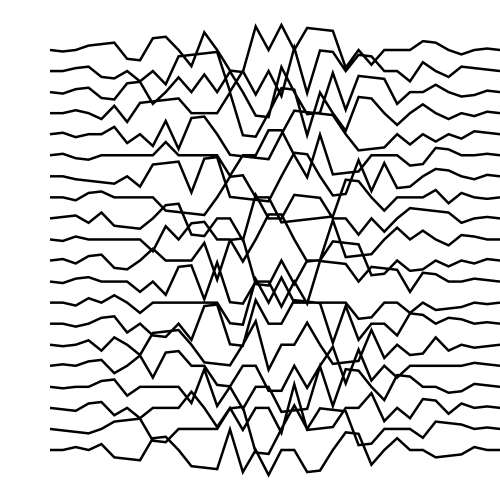

In [67]:
@disp
def draw(cr, width, height):
    
    cr.scale(width, height)
    cr.set_line_width(0.005)
    
    xp = np.linspace(0.1, 1.0, 36)
    yp = np.linspace(0.1, 0.9, 20)
    d = np.linspace(0.0, 0.05, int(len(xp)/2))
    d1 = d[1:]
    displace = np.concatenate([d, d1[::-1], [0]])
    
    for y in range(len(yp)):
        
        cr.move_to(0.1, yp[y])
        for x in range(len(xp)):
            
            cr.save()
            side = random.choice([-1, 0, 1])
            cr.line_to(xp[x], yp[y] + displace[x] * side)    
            cr.restore()
            
        cr.set_operator(cairo.OPERATOR_OUT)
            
    
    # cr.fill()
    
    cr.stroke()